In [1]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
from IPython.display import display


In [2]:
from sklearn.model_selection import train_test_split

In [18]:

data = pd.read_csv('../processed_data/v5_obs_combined/all_once_rf_impute.csv' , index_col='src_id')
data = data[data['class'].isin(['CV' , 'PL' , 'NS' , 'BH' ,'TC' ])]
display(data)
data['class'].value_counts()


,class,significance,photflux_aper_hilim_u,photflux_aper_hilim_b,photflux_aper_lolim_h,photflux_aper_m,photflux_aper_hilim_m,photflux_aper_hilim_s,photflux_aper_lolim_m,photflux_aper_lolim_b,...,bb_ampl,bb_ampl_lolim,bb_kt_hilim,brems_kt_lolim,brems_kt,brems_kt_hilim,brems_nh_lolim,brems_stat,brems_nh_hilim,brems_nh
src_id,,,,,,,,,,,,,,,,,,,,,
BH0001,BH,-0.092963,-0.321141,0.442908,0.515656,0.589796,0.549171,0.609565,0.695685,0.549074,...,-0.502055,-0.515330,-0.535712,-0.398119,-0.492976,-0.378602,-0.770061,-0.871349,-0.726233,-0.743487
BH0003,BH,-0.143817,-0.221056,0.454411,0.766986,0.732369,0.705112,0.069116,0.804934,0.545875,...,-0.505944,-0.520658,-0.494571,-0.383140,-0.469388,-0.376393,-0.586944,-0.072503,-0.545159,-0.557504
BH0004,BH,-0.272880,-1.341423,0.114878,0.581779,0.308017,0.280342,-0.635451,0.437881,0.242793,...,-0.505085,-0.519907,-0.486718,-0.427275,-0.507460,-0.378873,-0.353273,-1.377949,-0.266964,-0.296700
BH0006,BH,0.205001,-0.201856,1.230125,1.314389,1.473151,1.454381,1.058235,1.434725,1.221016,...,-0.502676,-0.516584,-0.487697,-0.214107,-0.358423,-0.371227,-0.661324,-0.788023,-0.644229,-0.646787
BH0008,BH,-0.400107,-1.325881,-0.741700,-0.022781,-0.760228,-0.735739,-1.978598,-0.610354,-0.587607,...,-0.268649,-0.276070,0.502275,-0.233691,-0.237927,-0.282081,0.965514,-0.183550,0.808601,0.806093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TC0057,TC,-0.090209,-0.895975,-0.095498,0.330975,-0.100632,-0.118408,-0.749165,-0.006003,-0.074813,...,-0.507686,-0.522061,-0.389582,1.239170,3.331563,4.411569,-0.598720,-0.749379,-0.547003,-0.567186
TC0058,TC,-0.274165,-0.744381,-0.328065,-0.174223,-0.305258,-0.264299,-0.299743,-0.264944,-0.284775,...,-0.280457,-0.278376,-0.215837,-0.253046,-0.246394,-0.283647,-0.359334,-0.258631,-0.342759,-0.342818
TC0059,TC,-0.434988,-0.358258,-1.080964,-1.564248,-0.829224,-0.747356,-0.486211,-0.986286,-1.276238,...,0.444821,0.291588,-0.055367,-0.234094,-0.253780,-0.165707,0.075555,0.917218,-0.033115,0.005676


PL    118
CV     65
TC     59
NS     48
BH     27
Name: class, dtype: int64

In [19]:
data = data.replace('NS' , 'XRB')
data = data.replace('BH' , 'XRB')
#display(data)
data_train = data[data['class'].isin(['XRB' , 'CV' , 'PL'])]
data_label = data_train['class']
display(data_train)
display(data_label)


,class,significance,photflux_aper_hilim_u,photflux_aper_hilim_b,photflux_aper_lolim_h,photflux_aper_m,photflux_aper_hilim_m,photflux_aper_hilim_s,photflux_aper_lolim_m,photflux_aper_lolim_b,...,bb_ampl,bb_ampl_lolim,bb_kt_hilim,brems_kt_lolim,brems_kt,brems_kt_hilim,brems_nh_lolim,brems_stat,brems_nh_hilim,brems_nh
src_id,,,,,,,,,,,,,,,,,,,,,
BH0001,XRB,-0.092963,-0.321141,0.442908,0.515656,0.589796,0.549171,0.609565,0.695685,0.549074,...,-0.502055,-0.515330,-0.535712,-0.398119,-0.492976,-0.378602,-0.770061,-0.871349,-0.726233,-0.743487
BH0003,XRB,-0.143817,-0.221056,0.454411,0.766986,0.732369,0.705112,0.069116,0.804934,0.545875,...,-0.505944,-0.520658,-0.494571,-0.383140,-0.469388,-0.376393,-0.586944,-0.072503,-0.545159,-0.557504
BH0004,XRB,-0.272880,-1.341423,0.114878,0.581779,0.308017,0.280342,-0.635451,0.437881,0.242793,...,-0.505085,-0.519907,-0.486718,-0.427275,-0.507460,-0.378873,-0.353273,-1.377949,-0.266964,-0.296700
BH0006,XRB,0.205001,-0.201856,1.230125,1.314389,1.473151,1.454381,1.058235,1.434725,1.221016,...,-0.502676,-0.516584,-0.487697,-0.214107,-0.358423,-0.371227,-0.661324,-0.788023,-0.644229,-0.646787
BH0008,XRB,-0.400107,-1.325881,-0.741700,-0.022781,-0.760228,-0.735739,-1.978598,-0.610354,-0.587607,...,-0.268649,-0.276070,0.502275,-0.233691,-0.237927,-0.282081,0.965514,-0.183550,0.808601,0.806093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PL0133,PL,0.276601,0.104718,1.223345,1.390954,1.232316,1.204622,0.839641,1.235589,1.214471,...,-0.506179,-0.520199,-0.425582,3.147032,3.331563,2.866795,-0.659365,-0.678732,-0.640027,-0.644061
PL0134,PL,-0.431133,0.474750,0.320946,-0.401373,0.495286,0.525492,0.878897,0.522618,0.341338,...,-0.279692,-0.287526,-0.105759,-0.224856,-0.258647,-0.294995,-0.451794,-0.405459,-0.414213,-0.429300
PL0135,PL,-0.375689,0.997181,0.350804,-0.099807,0.499493,0.482792,0.809518,0.587568,0.430891,...,-0.281279,-0.289122,-0.083085,-0.214690,-0.236008,-0.294977,-0.403847,-0.566087,-0.363035,-0.391829


src_id
BH0001    XRB
BH0003    XRB
BH0004    XRB
BH0006    XRB
BH0008    XRB
         ... 
PL0133     PL
PL0134     PL
PL0135     PL
PL0136     PL
PL0138     PL
Name: class, Length: 258, dtype: object

In [20]:

x = data_train.copy()
y = data_label.copy()

x_train_all , x_test_all , y_train , y_test = train_test_split(x , y , test_size=0.2 , shuffle=True, random_state=10 , stratify=y)
data_val = data[data['class']=='TC']

info_col =  ['class' ,  'significance']


x_train = x_train_all.drop(columns = info_col)
x_test = x_test_all.drop(columns = info_col)
x_val = data_val.drop(columns = info_col)

id_train = x_train_all[info_col]
id_test = x_test_all[info_col]
id_val = data_val[info_col]

sig_train = id_train['significance']
sig_test = id_test['significance']
sig_val = id_val['significance']


y_train = y_train.replace('XRB' , 0)
y_train = y_train.replace('CV' , 1)
y_train = y_train.replace('PL' , 2)
print(y_train)
display(x_train)

src_id
NS0021    0
PL0020    2
NS0054    0
PL0051    2
BH0028    0
         ..
NS0041    0
PL0055    2
CV0088    1
NS0075    0
PL0118    2
Name: class, Length: 206, dtype: int64


,photflux_aper_hilim_u,photflux_aper_hilim_b,photflux_aper_lolim_h,photflux_aper_m,photflux_aper_hilim_m,photflux_aper_hilim_s,photflux_aper_lolim_m,photflux_aper_lolim_b,photflux_aper_s,photflux_aper_u,...,bb_ampl,bb_ampl_lolim,bb_kt_hilim,brems_kt_lolim,brems_kt,brems_kt_hilim,brems_nh_lolim,brems_stat,brems_nh_hilim,brems_nh
src_id,,,,,,,,,,,,,,,,,,,,,
NS0021,1.871105,-0.314038,0.721836,0.114779,-0.542571,-0.179024,-0.020510,-0.359482,-0.225870,1.787914,...,-0.505413,-0.520193,-0.241230,0.828198,1.531214,1.132583,2.367807,-0.665448,2.166405,2.392767
PL0020,1.389882,-1.397577,-1.541882,-1.263826,-1.102806,-0.850558,-0.758289,-1.429331,-0.979197,1.146362,...,0.896360,1.130200,0.827855,-0.190689,-0.164128,-0.136373,0.683599,0.412677,0.434640,0.516282
NS0054,-0.494939,-0.627446,-0.353878,-0.705646,-0.659268,-0.500689,-0.607603,-0.506722,-0.501347,-0.522891,...,-0.279373,-0.281072,-0.059022,-0.233408,-0.247607,-0.284123,-0.135062,-0.013263,-0.163514,-0.160539
PL0051,0.029461,-0.046562,0.051366,-0.094078,0.028424,0.144135,-0.199681,-0.092303,-0.003043,-0.047147,...,-0.281186,-0.280074,-0.073510,-0.226821,-0.239751,-0.288801,-0.350802,-0.343997,-0.326844,-0.326160
BH0028,-0.302641,-0.317677,-0.229336,-0.357387,-0.352802,0.019686,-0.240468,-0.185227,0.055264,0.029976,...,-0.284428,-0.290455,-0.215864,-0.240927,-0.259978,-0.305739,-0.319235,-0.531998,-0.260356,-0.311189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NS0041,-1.091682,-0.640248,0.060885,-0.843651,-0.759745,-1.587375,-0.822832,-0.542980,-1.685607,-1.018024,...,0.274339,0.006878,0.496301,-0.234903,-0.246738,-0.162847,1.044838,0.044880,0.936304,0.915807
PL0055,0.048963,0.037109,0.331987,0.083653,0.144754,-0.116210,0.096309,0.047584,-0.268256,-0.021678,...,-0.279010,-0.279096,-0.098560,-0.228224,-0.240093,-0.279213,-0.438428,-0.393447,-0.391755,-0.419939
CV0088,-0.862992,-0.764963,-0.887987,-0.908620,-0.903539,-0.509105,-1.014333,-0.958380,-0.580193,-1.358929,...,0.374900,0.244732,-0.054296,-0.235331,-0.250531,-0.169895,-0.067825,-0.013589,-0.130780,-0.092340


In [21]:
one_hot_y_train =  to_categorical(y_train)

In [22]:
#from tensorflow.keras.layers import Flatten
#from tensorflow.keras.layers.convolutional import Conv2D
#from tensorflow.keras.layers.pooling import MaxPooling2D
visible = layers.Input(shape=(89,1))
x = layers.BatchNormalization(axis=-1)(visible)
x = layers.Conv1D(32, kernel_size=4, activation='relu')(visible)
x = layers.MaxPool1D(pool_size=(2))(x)

x = layers.Conv1D(32, kernel_size=4, activation='relu')(x)
x = layers.MaxPool1D(pool_size=(2))(x)

#x = layers.Conv1D(32, kernel_size=4, activation='relu')(x)
x = layers.MaxPooling1D(pool_size=(2))(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation='relu')(x)
x = layers.Dense(10, activation='relu')(x)
output = layers.Dense(3, activation='softmax')(x)
model_cnn = keras.Model(inputs=visible, outputs=output)
# summarize layers
#print(model_cnn.summary())
model_cnn.compile(
        loss = "categorical_crossentropy",
        optimizer = keras.optimizers.Adam(learning_rate=0.001),
        metrics = ["accuracy"],
    )
history = model_cnn.fit(x_train, one_hot_y_train, batch_size=256, epochs=500, validation_split=0.2 , sample_weight=sig_train)

Epoch 1/500
1/1 [==============================] - 1s 988ms/step - loss: 0.0971 - accuracy: 0.3780 - val_loss: -0.1255 - val_accuracy: 0.4048
Epoch 2/500
1/1 [==============================] - 0s 38ms/step - loss: 0.0723 - accuracy: 0.4390 - val_loss: -0.1250 - val_accuracy: 0.4048
Epoch 3/500
1/1 [==============================] - 0s 45ms/step - loss: 0.0509 - accuracy: 0.4817 - val_loss: -0.1257 - val_accuracy: 0.4524
Epoch 4/500
1/1 [==============================] - 0s 41ms/step - loss: 0.0327 - accuracy: 0.4512 - val_loss: -0.1267 - val_accuracy: 0.4762
Epoch 5/500
1/1 [==============================] - 0s 42ms/step - loss: 0.0191 - accuracy: 0.4451 - val_loss: -0.1274 - val_accuracy: 0.4524
Epoch 6/500
1/1 [==============================] - 0s 41ms/step - loss: 0.0073 - accuracy: 0.4451 - val_loss: -0.1272 - val_accuracy: 0.5000
Epoch 7/500
1/1 [==============================] - 0s 39ms/step - loss: -0.0040 - accuracy: 0.4512 - val_loss: -0.1275 - val_accuracy: 0.5000
Epoch 8/500

In [25]:
#from tensorflow.keras.layers import Flatten
#from tensorflow.keras.layers.convolutional import Conv2D
#from tensorflow.keras.layers.pooling import MaxPooling2D
visible = layers.Input(shape=(89,))
#x = layers.BatchNormalization(axis=-1)(visible)

x = layers.Dense(16, activation='relu')(visible)

#x = layers.Dense(32, activation='relu')(x)
output = layers.Dense(3, activation='softmax')(x)
model_cnn = keras.Model(inputs=visible, outputs=output)
# summarize layers
#print(model_cnn.summary())
model_cnn.compile(
        loss = "categorical_crossentropy",
        optimizer = keras.optimizers.Adam(learning_rate=0.001),
        metrics = ["accuracy"],
    )
history = model_cnn.fit(x_train, one_hot_y_train, batch_size=256, epochs=200, validation_split=0.2 , )

Epoch 1/200
1/1 [==============================] - 1s 536ms/step - loss: 1.1711 - accuracy: 0.3720 - val_loss: 1.0774 - val_accuracy: 0.4524
Epoch 2/200
1/1 [==============================] - 0s 27ms/step - loss: 1.1447 - accuracy: 0.3841 - val_loss: 1.0559 - val_accuracy: 0.4524
Epoch 3/200
1/1 [==============================] - 0s 25ms/step - loss: 1.1219 - accuracy: 0.3963 - val_loss: 1.0394 - val_accuracy: 0.4524
Epoch 4/200
1/1 [==============================] - 0s 27ms/step - loss: 1.1022 - accuracy: 0.4390 - val_loss: 1.0270 - val_accuracy: 0.5476
Epoch 5/200
1/1 [==============================] - 0s 29ms/step - loss: 1.0852 - accuracy: 0.4451 - val_loss: 1.0168 - val_accuracy: 0.5476
Epoch 6/200
1/1 [==============================] - 0s 28ms/step - loss: 1.0699 - accuracy: 0.4390 - val_loss: 1.0081 - val_accuracy: 0.5238
Epoch 7/200
1/1 [==============================] - 0s 27ms/step - loss: 1.0559 - accuracy: 0.4695 - val_loss: 1.0005 - val_accuracy: 0.5476
Epoch 8/200
1/1 [==

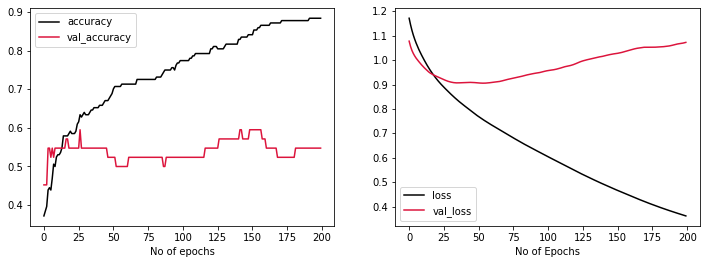

In [26]:
hist = history.history
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(hist['accuracy'] , label = 'accuracy' , color='k')
plt.plot(hist['val_accuracy'] , label = 'val_accuracy' , color='crimson')
plt.xlabel('No of epochs')
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist['loss'] , label = 'loss' , color='k')
plt.plot(hist['val_loss'] , label='val_loss' , color='crimson')
plt.xlabel("No of Epochs")
plt.legend()
#plt.savefig('plots/bn_model_level_0_rows.png')
plt.show()

In [51]:
258*0.2

51.6